# Seam Carver

Seam carving is an operator for content-aware image resizing, to eliminate distortion. It is implemented using Viterbi algorithm with "max" replaced by "min", i.e. find the sequence of latent variables corresponds to the minimum energy. 

A vertical (horizontal) seam is a path of pixels connected from top (left) to bottom (right) in an image with one pixel in each row (column). We want to find the seam with minimal energy (sum of the energy of the pixels on the seam).

Transition probability (ensure continuity):
    
    p(zn = k'| zn−1 = k) =    1       if |k - k'| <= 1
    p(zn = k'| zn−1 = k) = infinity      otherwise
    
Emission probability: 
    
    p(xn|zn = k) = e(n, k)
   
(Implementation details can be found in seam_carver.py)


The following sections will compare Seam Carver to normal image resizing. 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Use matplotlib to display the original image

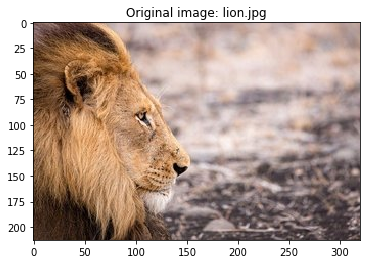

Original image size: 213*320


In [2]:
img_input = cv2.imread('lion.jpg')
height_input, width_input = img_input.astype(np.float64).shape[: 2]

plt.imshow(cv2.cvtColor(img_input, cv2.COLOR_BGR2RGB))
plt.title("Original image: lion.jpg")
plt.show()

print('Original image size: {}*{}'.format(height_input, width_input))

## Image resizing
let's make this image square shape

In [3]:
height_output = height_input
width_output = height_output
print('Output image size: {}*{}'.format(height_output, width_output))

Output image size: 213*213


### Normal image resizing 

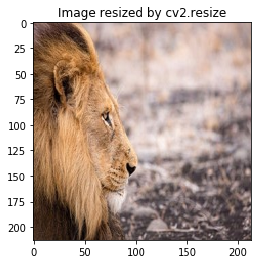

In [4]:
img_resized = cv2.resize(img_input, (width_output, height_output), interpolation = cv2.INTER_AREA)
plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
plt.title("Image resized by cv2.resize")
plt.show()

### Seam carving

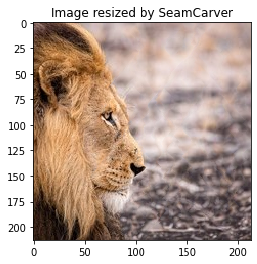

In [5]:
from seam_carver import SeamCarver

SC = SeamCarver('lion.jpg', height_output, width_output)
img_sc = SC.out_image.astype(np.uint8)

plt.imshow(cv2.cvtColor(img_sc, cv2.COLOR_BGR2RGB))
plt.title("Image resized by SeamCarver")
plt.show()

## Result comparison

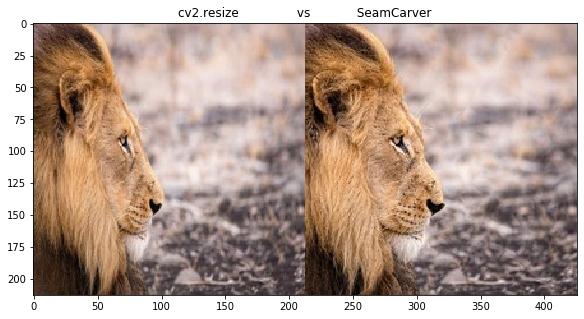

In [6]:
plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(np.hstack((img_resized, img_sc)), cv2.COLOR_BGR2RGB))
plt.title("cv2.resize               vs            SeamCarver")
plt.show()

`It is clear that Seam Carver preserves better aspect ratio of the content from the original picture.`